
NYU Data Science BootCamp Week 3 Assignment

Name: Hardik Setia

NetID: hs5595

Question 1.⁠ ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

C:\Users\Dell\AppData\Local\Temp\ipykernel_16140\3682709895.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')


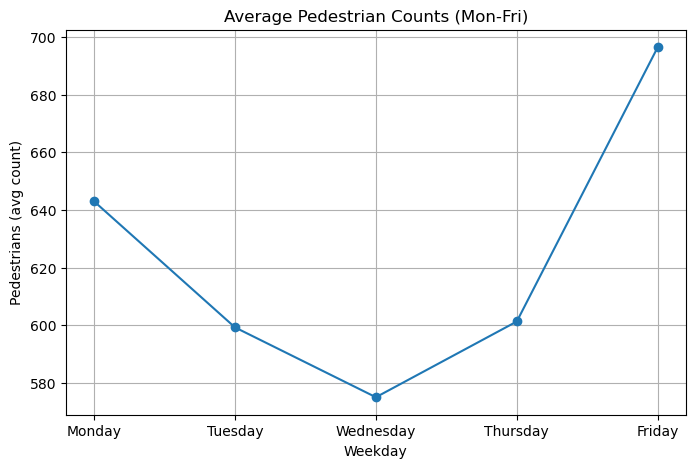

In [13]:
import pandas as pd
import matplotlib.pyplot as plt



# 1. Read the CSV file into a DataFrame
df = pd.read_csv("https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD")

# -----------------------------------------------------------------------------
# Part 0: Data Preprocessing
# -----------------------------------------------------------------------------

# Convert the "hour_beginning" column to datetime
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')

# Ensure your Pedestrians column is numeric (in case of parsing issues):
df['Pedestrians'] = pd.to_numeric(df['Pedestrians'], errors='coerce')

# Check if other relevant numeric columns need conversion:
df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')
df['precipitation'] = pd.to_numeric(df['precipitation'], errors='coerce')
df['Towards Manhattan'] = pd.to_numeric(df['Towards Manhattan'], errors='coerce')
df['Towards Brooklyn'] = pd.to_numeric(df['Towards Brooklyn'], errors='coerce')

# -----------------------------------------------------------------------------
# Part 1: Filter data for weekdays (Mon-Fri) and plot a line graph 
#         showing the Pedestrians counts for each day of the week.
# -----------------------------------------------------------------------------

# Create a new column for day name
df['day_of_week'] = df['hour_beginning'].dt.day_name()  # e.g., Monday, Tuesday, ...

# Filter to weekdays only: Monday=0 ... Sunday=6
weekdays_df = df[df['hour_beginning'].dt.dayofweek < 5]  # 0 through 4 are Mon-Fri

# Let's group by day_of_week and calculate the average Pedestrians count
# Then reorder by actual weekday sequence
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
weekday_counts = (
    weekdays_df.groupby('day_of_week')['Pedestrians']
    .mean()
    .reindex(order)  # ensures order is Mon -> Fri
)

# Plot a line graph
plt.figure(figsize=(8, 5))
plt.plot(weekday_counts.index, weekday_counts.values, marker='o')
plt.title("Average Pedestrian Counts (Mon-Fri)")
plt.xlabel("Weekday")
plt.ylabel("Pedestrians (avg count)")
plt.grid(True)
plt.show()


2.⁠ ⁠Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

Average Pedestrian Count by Weather Summary (2019):
weather_summary
partly-cloudy-day      1574.093627
clear-day              1382.183298
wind                    679.000000
cloudy                  543.225041
rain                    229.822076
snow                    222.631579
fog                     212.409091
sleet                   178.250000
partly-cloudy-night      52.765922
clear-night              33.233871
Name: Pedestrians, dtype: float64

Correlation Matrix (2019):
                   Pedestrians  Towards Manhattan  Towards Brooklyn  \
Pedestrians           1.000000           0.989069          0.991341   
Towards Manhattan     0.989069           1.000000          0.961141   
Towards Brooklyn      0.991341           0.961141          1.000000   
temperature           0.358757           0.356150          0.354475   
precipitation        -0.105432          -0.104927         -0.103942   

                   temperature  precipitation  
Pedestrians           0.358757      -0.105432

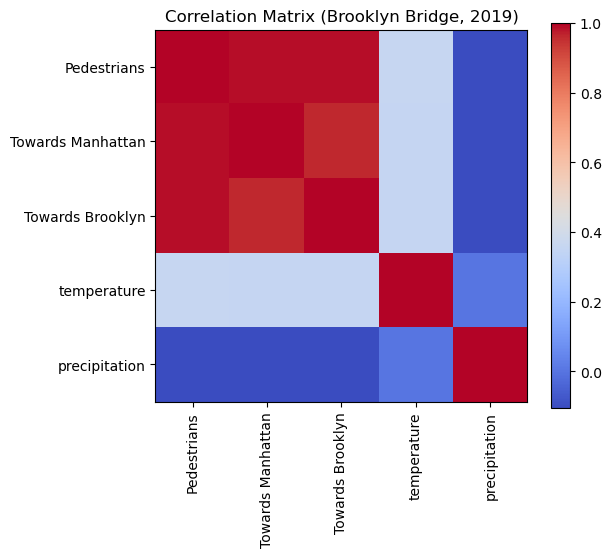

In [14]:
# Filter for the year 2019
df_2019 = df[df['hour_beginning'].dt.year == 2019].copy()

# Group by weather_summary to see average Pedestrians count
weather_summary_counts = (
    df_2019.groupby('weather_summary')['Pedestrians']
    .mean()
    .sort_values(ascending=False)
)

print("Average Pedestrian Count by Weather Summary (2019):")
print(weather_summary_counts)

# Create a correlation matrix among numeric columns of interest
# Let's include 'Pedestrians', 'Towards Manhattan', 'Towards Brooklyn',
# 'temperature', and 'precipitation'.
cols_of_interest = [
    'Pedestrians',
    'Towards Manhattan',
    'Towards Brooklyn',
    'temperature',
    'precipitation'
]
# Keep only columns that actually exist in your data
cols_of_interest = [col for col in cols_of_interest if col in df_2019.columns]

corr_matrix = df_2019[cols_of_interest].corr()
print("\nCorrelation Matrix (2019):")
print(corr_matrix)

# Optional: visualize the correlation matrix
plt.figure(figsize=(6, 5))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(cols_of_interest)), cols_of_interest, rotation=90)
plt.yticks(range(len(cols_of_interest)), cols_of_interest)
plt.title("Correlation Matrix (Brooklyn Bridge, 2019)")
plt.show()


3 Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.


Average Pedestrian Count by Time of Day:
time_of_day
Afternoon    1749.484305
Evening       908.873318
Morning       529.699338
Night          50.086680
Name: Pedestrians, dtype: float64


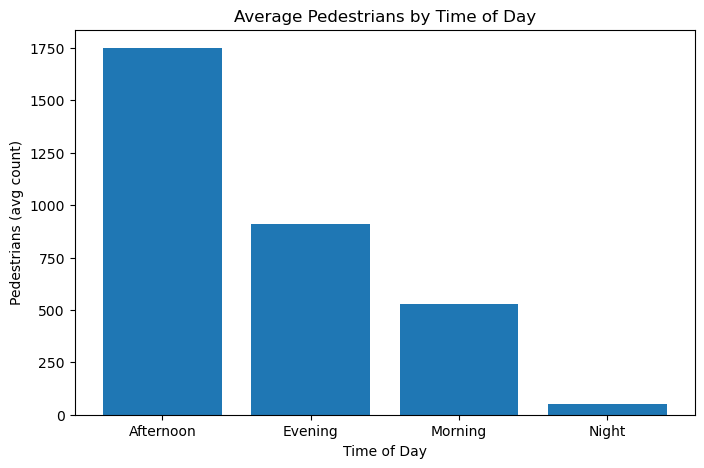

In [15]:
# Extract hour if you haven't yet
df['hour'] = df['hour_beginning'].dt.hour

def categorize_time_of_day(hour):
    """
    Categorize time of day based on hour (0-23).
    """
    if 5 <= hour < 12:
        return 'Morning'   # 5 AM to 11 AM
    elif 12 <= hour < 17:
        return 'Afternoon' # 12 PM to 4 PM
    elif 17 <= hour < 21:
        return 'Evening'   # 5 PM to 8 PM
    else:
        return 'Night'     # 9 PM to 4 AM

# Apply the custom function
df['time_of_day'] = df['hour'].apply(categorize_time_of_day)

# Group by the new 'time_of_day' column to see how pedestrian counts vary
tod_counts = df.groupby('time_of_day')['Pedestrians'].mean()

print("\nAverage Pedestrian Count by Time of Day:")
print(tod_counts)

# (Optional) Plot a bar chart of Pedestrians by time_of_day
plt.figure(figsize=(8, 5))
plt.bar(tod_counts.index, tod_counts.values)
plt.title("Average Pedestrians by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Pedestrians (avg count)")
plt.show()